In [1]:
import d2lzh as d2l
from mxnet import autograd,nd

In [19]:
# 读取数据集
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

In [6]:
# 初始化模型参数
num_inputs=784
num_outputs=10

W=nd.random.normal(scale=0.01,shape=(num_inputs,num_outputs))
b= nd.zeros(num_outputs)
W.attach_grad()
b.attach_grad()

In [7]:
# 实现softmax运算
def softmax(X):
    X_exp=X.exp()
    partition=X_exp.sum(axis=1,keepdims=True)
    return X_exp/partition # 这里应用了广播机制

In [8]:
X = nd.random.normal(shape=(2,5))
X_prob = softmax(X)
X_prob,X_prob.sum(axis=1)

(
 [[0.32651287 0.2196676  0.10925111 0.2976461  0.04692229]
  [0.78728867 0.02220864 0.02097706 0.14454156 0.02498409]]
 <NDArray 2x5 @cpu(0)>,
 
 [0.99999994 1.        ]
 <NDArray 2 @cpu(0)>)

In [9]:
# 定义模型
def net(X):
    return softmax(nd.dot(X.reshape((-1,num_inputs)),W)+b)

In [10]:
y=nd.array([0,2],dtype='int32')

In [11]:
y


[0 2]
<NDArray 2 @cpu(0)>

In [12]:
# 定义交叉熵损失函数
def cross_entropy(y_hat,y):
    return -nd.pick(y_hat,y).log()

In [13]:
def accuracy(y_hat,y):
    return(y_hat.argmax(axis=1)== y.astype('float32')).mean().asscalar()

In [15]:
# 计算模型准确率
def evaluate_accuracy(data_iter,net):
    acc_sum,n=0.0,0
    for X,y in data_iter:
        y = y.astype('float32')
        acc_sum+=(net(X).argmax(axis=1)==y).sum().asscalar()
        n+=y.size
    return acc_sum/n

In [16]:
net

<function __main__.net(X)>

In [17]:
ecaluate_accuracy(test_iter,net)

NameError: name 'ecaluate_accuracy' is not defined

In [20]:
evaluate_accuracy(test_iter,net)

0.1141

In [21]:
# 训练模型
num_epochs,lr=5,0.1
def train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,trainer=None):
    for epoch in range(num_epochs):
        train_l_sum , train_acc_sum ,n=0.0,0.0,0
        for X,y in train_iter:
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat,y).sum()
            l.backward()
            if trainer is None:
                d2l.sgd(params,lr,batch_size)
            else:
                trainer.step(batch_size)
            y= y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum +=(y_hat.argmax(axis=1)==y).sum().asscalar()
            n+=y.size
        test_acc= evaluate_accuracy(test_iter,net)
        print('epoch%d,loss%.4f,train acc %.3f,test acc %.3f' %(epoch+1,train_l_sum/n,train_acc_sum/n,test_acc))

In [22]:
train_ch3(net,train_iter,test_iter,cross_entropy,num_epochs,batch_size,[W,b],lr)

epoch1,loss0.7885,train acc 0.748,test acc 0.803
epoch2,loss0.5740,train acc 0.811,test acc 0.815
epoch3,loss0.5297,train acc 0.823,test acc 0.831
epoch4,loss0.5047,train acc 0.831,test acc 0.838
epoch5,loss0.4888,train acc 0.835,test acc 0.842


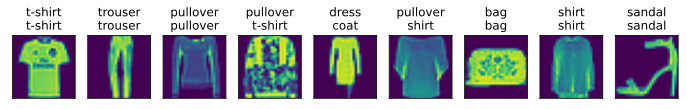

In [26]:
for X, y in test_iter:
    break
true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true+'\n'+pred for true,pred in zip(true_labels,pred_labels)]
d2l.show_fashion_mnist(X[0:9],titles[0:9])